In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score, precision_recall_curve, accuracy_score,auc
from scipy.stats import ttest_ind

In [22]:
metadata = pd.read_csv("metadata.csv",header=0,index_col=0)
microbiome = pd.read_csv("microbiome.csv",header=0,index_col=0)
metabolome = pd.read_csv("serum_lipo.csv",header=0,index_col=0)

In [23]:
diseases_to_categories = {'Metabolic_Syndrome':['1'],'Type_2_Diabetes':['3'],'Coronary_Artery_Disease':['4','5','6'],'Severe_Obesity':['2a','2b'],'Heart_Failure':['6','7'],'Healthy':['8']}

In [ ]:
diseases_counts = {}
for disease in diseases_to_categories.keys():
    diseases_counts[disease]= metadata[metadata['PATGROUPFINAL_C'].isin(diseases_to_categories[disease])].shape[0]
df = pd.DataFrame(list(diseases_counts.items()), columns=['Disease', 'Count'])
plt.rcParams.update({'font.size':10})
ax = sns.barplot(data=df, x='Disease', y='Count', color='salmon')
plt.xticks(rotation=45)
plt.title('Diseases Distribution')
plt.xlabel('Disease')
plt.ylabel('Count')
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height + 1,
        f'{int(height)}',
        ha='center',
        va='bottom'
    )

plt.show()

In [24]:
metabolome.shape

(1383, 105)

In [25]:
microbiome_train ,microbiome_test, train_diseases, test_diseases = train_test_split(microbiome, metadata[['PATGROUPFINAL_C']], train_size=0.8)
train_idx = microbiome_train.index
test_idx  = microbiome_test.index
metabolome_train = metabolome.loc[train_idx]
metabolome_test  = metabolome.loc[test_idx]
# metadata_train = metadata.loc[train_idx]
# metadata_test = metadata.loc[test_idx]
metabolome_and_diseases_train = pd.merge(metabolome_train, metadata[['PATGROUPFINAL_C']], left_index=True, right_index=True, how='inner')
metabolome_and_diseases_train

,H1A1,H1A2,H1CH,H1FC,H1PL,H1TG,H2A1,H2A2,H2CH,H2FC,...,V6CH,V6FC,V6PL,V6TG,VLAB,VLCH,VLFC,VLPL,VLTG,PATGROUPFINAL_C
SampleID,,,,,,,,,,,,,,,,,,,,,
x20MCx2626,8.918021,1.768478,5.738871,1.509048,7.946470,3.954344,18.007360,3.516110,6.342091,1.425653,...,0.070689,0.127329,0.337757,2.077547,12.561299,49.913409,21.735367,47.523697,225.064545,3
x10MCx1778,67.067160,6.481075,45.412099,11.877792,52.516892,4.090248,33.551660,5.266727,16.735348,4.120717,...,0.178143,0.099156,0.261148,1.911795,1.985948,4.868261,4.255717,9.477274,36.076983,3
x30MCx1293,20.949185,1.944493,12.537269,3.772511,16.546817,2.367537,17.742456,1.975462,7.469378,1.771134,...,0.109492,0.095090,0.249983,1.055818,5.153862,11.107534,6.291108,12.528699,42.685434,5
x20MCx1489,26.722816,2.539833,17.093100,5.632147,21.930607,2.885403,22.910873,3.021177,9.704431,2.309980,...,0.126825,0.095965,0.252723,2.028431,3.308976,6.444745,4.244246,8.301475,31.890108,2b
x10MCx3153,4.668950,0.153028,4.294523,2.242887,4.341766,1.636391,10.324577,0.778248,4.471001,0.968760,...,0.096063,0.093479,0.245616,0.248659,4.433309,10.585363,5.967671,12.176115,35.050052,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
x10MCx1146,14.939657,2.320023,12.688298,4.616546,16.143217,2.549654,20.977619,3.438042,9.408354,2.668848,...,0.142300,0.102990,0.271656,2.514741,6.737520,19.783802,9.657396,19.552573,66.679146,1
x20MCx1181,72.457584,7.705358,43.848351,11.530899,56.140461,6.442766,34.902356,5.020311,15.859847,4.090041,...,0.167733,0.098618,0.259944,1.835323,3.629999,10.162080,5.949414,11.025603,33.869673,8
x20MCx2669,8.998366,0.992357,5.412383,2.530224,7.585370,2.238061,15.651584,2.234270,6.030298,1.559816,...,0.097289,0.101343,0.267352,1.639156,5.574992,16.243043,8.659382,19.246994,80.593808,3


In [13]:
# correlations
correlation_metabolome_microbiome = {'Metabolite':[]}
for bacteria in microbiome_train.columns:
    correlation_metabolome_microbiome[bacteria] = []
for metabolite in metabolome_train.columns:
        correlation_metabolome_microbiome['Metabolite'].append(metabolite)
        for bacteria in microbiome_train.columns:
            correlation_metabolome_microbiome[bacteria].append(np.round(metabolome_train[metabolite].corr(microbiome_train[bacteria]), decimals=4))
correlation_metabolome_microbiome = pd.DataFrame(correlation_metabolome_microbiome).set_index('Metabolite')

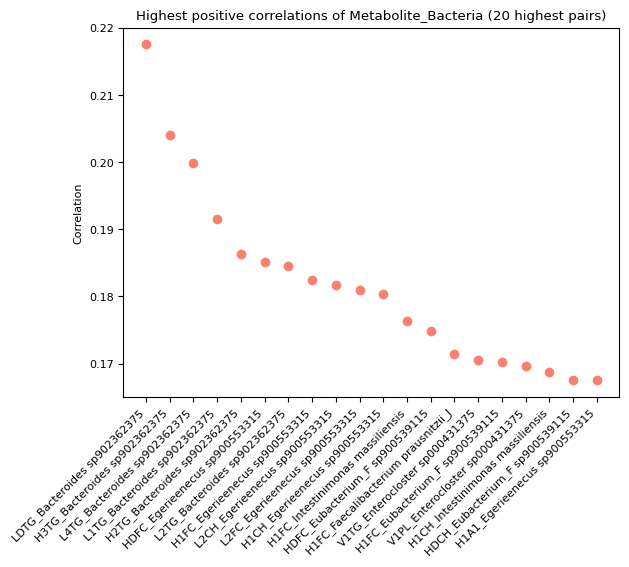

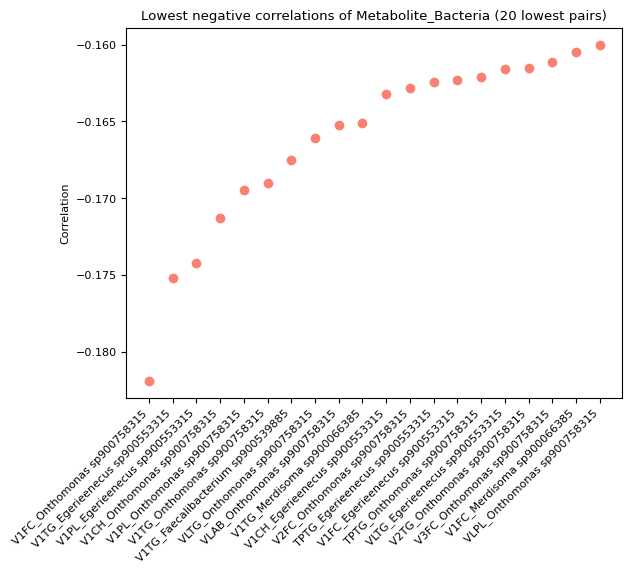

In [16]:
stacked_corrs = correlation_metabolome_microbiome.unstack()
df1 = stacked_corrs.nlargest(20).reset_index()
df2 = stacked_corrs.nsmallest(20).reset_index()
df1.columns = ['Bacteria', 'Metabolite', 'Corr']
df2.columns = ['Bacteria', 'Metabolite', 'Corr']
df1['Metabolite_Bacteria'] = df1['Metabolite'].astype(str) + '_' + df1['Bacteria'].astype(str)
df2['Metabolite_Bacteria'] = df2['Metabolite'].astype(str) + '_' + df2['Bacteria'].astype(str)
plt.rcParams.update({'font.size': 8})
plt.scatter(x=df1['Metabolite_Bacteria'],y=df1['Corr'],color='salmon')
plt.xticks(rotation=45, ha='right')
plt.title("Highest positive correlations of Metabolite_Bacteria (20 highest pairs)")
plt.ylabel('Correlation')
plt.show()
plt.scatter(x=df2['Metabolite_Bacteria'],y=df2['Corr'],color='salmon')
plt.xticks(rotation=45, ha='right')
plt.title("Lowest negative correlations of Metabolite_Bacteria (20 lowest pairs)")
plt.ylabel('Correlation')
plt.show()

In [ ]:
diseases = list(diseases_to_categories.keys())
healthy = metabolome_and_diseases_train[metabolome_and_diseases_train['PATGROUPFINAL_C'].isin(diseases_to_categories['Healthy'])]
for disease in diseases[:-1]:
    metabolites_in_disease = {'Metabolite':[], 'avg_amount':[],'pvalue':[],'pvalue-format':[]}
    x = metabolome_and_diseases_train[metabolome_and_diseases_train['PATGROUPFINAL_C'].isin(diseases_to_categories[disease])]
    for metabolite in metabolome_train.columns:
        t, pval = ttest_ind(healthy[metabolite], x[metabolite])
        metabolites_in_disease['Metabolite'].append(metabolite)
        metabolites_in_disease['avg_amount'].append(x[metabolite].mean())
        exponent = int(np.floor(np.log10(pval)))
        mantissa = round(pval / (10 ** exponent), 2)
        metabolites_in_disease['pvalue-format'].append(f"{mantissa}e{exponent}")
        metabolites_in_disease['pvalue'].append(pval)
    df = pd.DataFrame(metabolites_in_disease).rename({'avg_amount':'Average in '+disease,'pvalue':'pvalue in t-test with healthy'},axis=1).sort_values(by='pvalue in t-test with healthy')
    df = df.head(20)
    for met in df['Metabolite']:
        df.loc[df['Metabolite']==met,'In-Healthy'] = healthy[met].mean()
    df['abs_diff'] = (df['Average in ' + disease] - df['In-Healthy']).abs()
    fig, ax = plt.subplots(figsize=(14, 9.7))
    bars = ax.bar(df['Metabolite'], df['abs_diff'],color='skyblue',width=0.6,align='center')
    for bar, value, p, h in zip(bars, df['Average in '+disease], df['pvalue-format'], df['In-Healthy']):
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height(),
            f'{value:.2f}\n{p}\n{h:.2f}',
            ha='center', va='bottom',
            fontsize=8
        )
    ax.text(
        0.1, 0.98,
        "Order on top of each bar:\n"
        "Mean in disease\n"
        "p-value\n"
        "Mean in healthy",
        transform=ax.transAxes,
        fontsize=8,
        verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', edgecolor='gray')
    )
    # Format plot
    ax.set_xticks(range(len(df)))
    ax.set_xticklabels(df['Metabolite'], rotation=45)
    ax.tick_params(axis='y', which='both', length=0)
    ax.set_yticklabels([])
    ax.set_xlabel('Metabolite')
    ax.set_ylabel(f'Absolute difference between mean of {disease} samples and healthy samples')
    ax.set_title(f'Metabolites average amounts in health compared to {disease} (20 lowest pvalues)')
    # plt.tight_layout()
    ax.set_xlim(left=-0.5, right=len(df['Metabolite']) )
    plt.show()

In [57]:
def aupr_random_forest(train_data, train_labels, test_data, test_labels, plot_title):
    model = RandomForestClassifier()
    model.fit(train_data,train_labels)
    importances = model.feature_importances_
    gini_df = pd.DataFrame({'Feature': train_data.columns,'Gini Importance': importances}).sort_values(by='Gini Importance', ascending=False)
    labels_probs = model.predict_proba(test_data)[:, 1]
    confidence_df = pd.DataFrame({'Sample': test_data.index,'Confidence score': labels_probs}).sort_values(by='Confidence score', ascending=False)
    labels_pred = model.predict(test_data)
    precision, recall, thresholds = precision_recall_curve(test_labels, labels_probs)
    accuracy = accuracy_score(test_labels, labels_pred)
    aupr = auc(recall, precision)
    baseline = sum(test_labels) / len(test_labels)
    plt.figure(figsize=(8, 5))
    plt.plot(recall, precision, label=f'AUPR = {aupr:.4f}\nAccuracy = {accuracy:.4f}')
    plt.hlines(baseline, 0, 1, colors='r', linestyles='dashed', label=f'Baseline = {baseline:.4f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve '+plot_title)
    plt.legend()
    plt.tight_layout()
    plt.show()
    return confidence_df, gini_df

In [44]:
microbiome_and_metabolome_train = pd.merge(metabolome_train, microbiome_train, left_index=True, right_index=True, how='inner')
microbiome_and_metabolome_test = pd.merge(metabolome_test, microbiome_test, left_index=True, right_index=True, how='inner')
metadata['Disease_status'] = metadata['PATGROUPFINAL_C'].apply(lambda x:0 if x == '8' else 1)
metadata['T2D'] = metadata['PATGROUPFINAL_C'].apply(lambda x:1 if x in diseases_to_categories['Type_2_Diabetes'] else 0)
metadata['CAD'] = metadata['PATGROUPFINAL_C'].apply(lambda x:1 if x in diseases_to_categories['Coronary_Artery_Disease'] else 0)
metadata['HF'] = metadata['PATGROUPFINAL_C'].apply(lambda x:1 if x in diseases_to_categories['Heart_Failure'] else 0)
metadata['SO'] = metadata['PATGROUPFINAL_C'].apply(lambda x:1 if x in diseases_to_categories['Severe_Obesity'] else 0)
metadata['MS'] = metadata['PATGROUPFINAL_C'].apply(lambda x:1 if x in diseases_to_categories['Metabolic_Syndrome'] else 0)
metadata_train = metadata.loc[train_idx]
metadata_test = metadata.loc[test_idx]

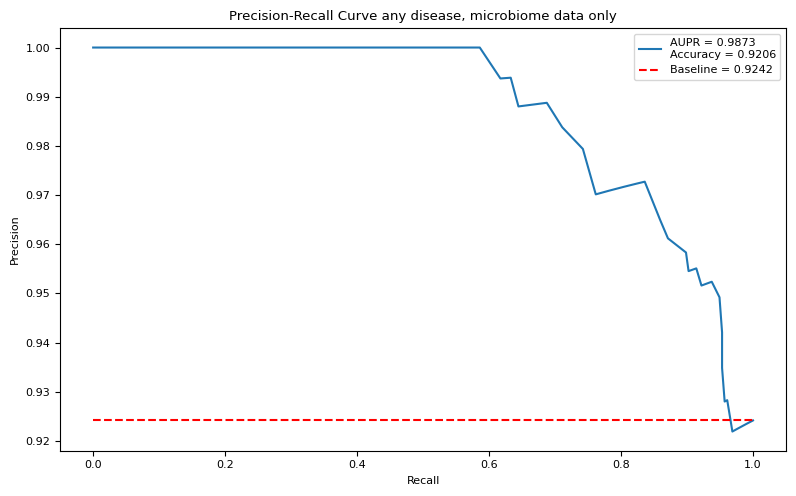

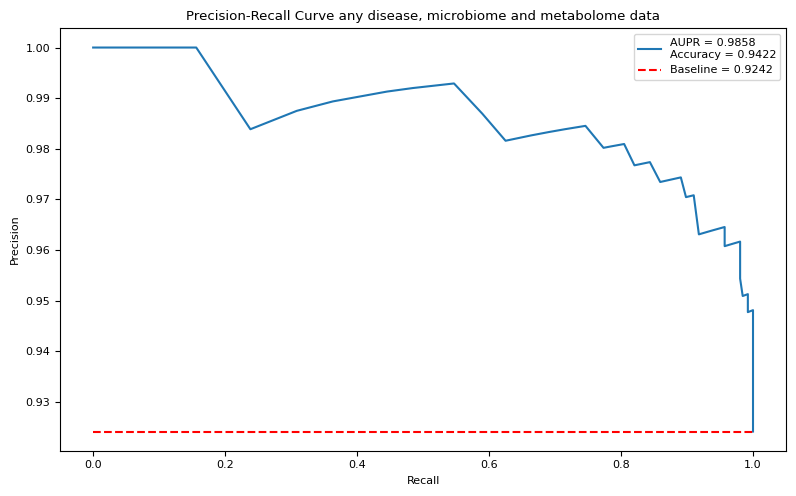

In [58]:
# classifying sick/healthy for any disease
x = aupr_random_forest(microbiome_train, metadata_train['Disease_status'],microbiome_test, metadata_test['Disease_status'], 'any disease, microbiome data only')
y = aupr_random_forest(microbiome_and_metabolome_train, metadata_train['Disease_status'],microbiome_and_metabolome_test,metadata_test['Disease_status'], 'any disease, microbiome and metabolome data')
x[1].to_csv("first_gini_rf_microonly.csv",index=False)
y[1].to_csv("first_gini_rf_micrometbole.csv",index=False)
x[0].to_csv("first_conf_rf_microonly.csv",index=False)
y[0].to_csv("first_conf_rf_micrometbole.csv",index=False)

In [47]:
y[1]

,Feature,Gini Importance
3,H1FC,0.020507
42,L2FC,0.019010
41,L2CH,0.017939
26,HDCH,0.014616
46,L3CH,0.013044
...,...,...
706,Desulfovibrio sp900319575,0.000000
374,Dorea formicigenerans,0.000000
420,Metalachnospira sp900548595,0.000000
303,Eisenbergiella tayi,0.000000


In [43]:
x[0]

,Sample,Confidence score
240,x20MCx2377,1.00
118,x11MCx1658,1.00
195,x11MCx2880,1.00
102,x12MCx3234,1.00
77,x20MCx2553,1.00
...,...,...
117,x30MCx1750,0.59
260,x30MCx2719,0.58
33,x14MCx3405,0.58
36,x30MCx3382,0.57


In [ ]:
# random forest for t2d
aupr_random_forest(microbiome_train, metadata['T2D'], 'Type 2 Diabetes, microbiome data only')
aupr_random_forest(microbiome_and_metabolome_train, metadata['T2D'], 'Type 2 Diabetes, microbiome and metabolome data')

In [ ]:
# random forest for cad
aupr_random_forest(microbiome_train, metadata['CAD'], 'Coronary Artery Disease, microbiome data only')
aupr_random_forest(microbiome_and_metabolome_train, metadata['CAD'], 'Coronary Artery Disease, microbiome and metabolome data')

In [ ]:
# random forest for so
aupr_random_forest(microbiome_train, metadata['SO'], 'Severe Obesity, microbiome data only')
aupr_random_forest(microbiome_and_metabolome_train, metadata['SO'], 'Severe Obesity, microbiome and metabolome data')

In [ ]:
# random forest for ms
aupr_random_forest(microbiome_train, metadata['MS'], 'Metabolic Syndrome, microbiome data only')
aupr_random_forest(microbiome_and_metabolome_train, metadata['MS'], 'Metabolic Syndrome, microbiome and metabolome data')

In [ ]:
# random forest for HF
aupr_random_forest(microbiome_train, metadata['HF'], 'Heart Failure, microbiome data only')
aupr_random_forest(microbiome_and_metabolome_train, metadata['HF'], 'Heart Failure, microbiome and metabolome data')